# Classification Algorithms

- **Logistic Regression**:  
  - Predicts probabilities using the logistic function (sigmoid). Outputs class labels via thresholds (e.g., 0.5).

- **Support Vector Machines (SVM)**:  
  - Finds the optimal hyperplane to separate classes with the maximum margin.

- **k-Nearest Neighbors (k-NN)**:  
  - Assigns a class based on the majority vote of the \( k \) closest training examples.

- **Naive Bayes**:  
  - Uses Bayes’ theorem with the "naive" assumption of feature independence.

---

# 🎯 ML: Logistic Regression

Logistic regression is a supervised learning technique used to solve classification problems. It predicts a categorical dependent variable using a given set of independent variables.

Despite its name, it is not a regression algorithm but a classification technique that models the probability of a binary response based on one or more predictor variables.

---

## **What is Logistic Regression?**
- Logistic regression is a statistical method used for classification, despite its name suggesting regression. 
- It predicts the probability that a given input belongs to a particular class, making it ideal for binary outcomes (e.g., spam vs. not spam) and extendable to multiclass problems. 
- It models assumes the relationship (linear) between features and the log-odds of the probability of the outcome using the logistic (**sigmoid**) function.

## **Why Use Logistic Regression?**
- **Probability Output**: Predicts probabilities, not just class labels.
- **Interpretability**: Coefficients reveal feature importance.
- **Efficiency**: Works well with linearly separable data and small-to-medium datasets.
- **Foundation**: Basis for understanding more complex models (e.g., neural networks).


## **Mathematical Formulation**
For binary classification:
1. **Linear Combination**: \( z = w_0 + w_1x_1 + w_2x_2 + \cdots + w_nx_n \), where \(w_i\) are weights and \(x_i\) are features.
2. **Sigmoid Function**
3. **Decision Rule**: Predict class 1 if \(P(y=1|X) > 0.5\), else class 0.

### Logistic (Sigmoid) Function
- **Formula**: `P(y=1|X) = σ(z) = 1 / (1 + e^(-z))`  
- The logistic (sigmoid) function maps any real value to a range between 0 and 1.
- The output probability helps determine whether the predicted class is 0 or 1 using a threshold value.
- **Threshold Concept**:
  - **If output ≥ 0.5**, classify as **1** (Will buy insurance).
  - **If output < 0.5**, classify as **0** (Will not buy insurance).


## Types of Logistic Regression

🛠️ Binary vs Multiclass Showdown

| Aspect                | Binary Classification       | Multiclass                         |
|-----------------------|------------------------------|------------------------------------|
| **Classes**           | 2                            | 3+                                 |
| **Activation**        | Sigmoid                      | Softmax                            |
| **Output**            | Single Probability           | Probability Distribution           |
| **SKLearn Parameter** | `multi_class='ovr'`          | `multi_class='multinomial'`        |
| **Example**           | Spam Detection 📧                   | Animal Classification 🐕🐈🐄 |
| **Decision Boundary** | Single threshold (0.5)              | Multiple probability checks  |

---

## Logistic Regression for Binary Classification
- **Model**: Logistic regression uses the **sigmoid function** to model the probability that an input belongs to the positive class (e.g., class 1):
  ```math
     P(y=1 | x) = 1 /(1 + e^-(w^T x + b))
  ```
  Here, \(w\) is the weight vector, \(x\) is the input feature vector, and \(b\) is the bias term. The output is a value between 0 and 1, interpreted as a probability.

- **Decision Rule**: If \(P(y=1 | x) > 0.5\), predict class 1; otherwise, predict class 0.

- **Training**: The model optimizes the weights \(w\) and bias \(b\) by minimizing a loss function, typically the **binary cross-entropy**.

---

## Assumptions of Logistic Regression

1. **Linear Relationship**: There is a linear relationship between the log-odds of the dependent variable and the independent variables, use polynomial features for non-linearity.
3. **Independence of Observations**: Each observation is independent of the others.
4. **No Multicollinearity**: The independent variables should not be highly correlated with each other.
5. **Large Sample Size**: Logistic Regression performs better with larger datasets.

---

## Logistic Regression for Multiclass

Multiclass logistic regression generalizes binary logistic regression to classify data into three or more categories (e.g., classifying flowers into setosa, versicolor, or virginica). It predicts the probability of each class and assigns the instance to the class with the highest probability.

### **Why Use It?**
- **Probability Estimates**: Provides probabilities for all classes.
- **Simplicity**: Extends linear methods to multiclass without needing complex models.
- **Foundation**: Underpins neural networks and softmax layers in deep learning.

### **Approaches**
1. **One-vs-Rest (OvR) / One-vs-All (OvA)**: Trains a separate binary classifier for each class against all others.
2. **Softmax Regression (Multinomial)**: Models all classes jointly using the softmax function, optimizing a single loss function.

## **Key Concepts and Methods**

### **1. One-vs-Rest (OvR)**
The **One-vs-Rest** (also called One-vs-All) method breaks down a multiclass problem into multiple binary classification tasks.
- **How It Works**:
  - For \(k\) classes, train \(k\) separate binary logistic regression models.
  - Each model distinguishes one class (positive) from all other classes combined (negative).
  - Example: For three classes (A, B, C):
    1. Model 1: A vs. (B + C)
    2. Model 2: B vs. (A + C)
    3. Model 3: C vs. (A + B)
- **Prediction**: Choose the class with the highest probability across all classifiers.
- **Loss**: Binary cross-entropy for each classifier.

### 2. Multinomial Logistic Regression (Softmax Approach)

The **Multinomial** or **Softmax** approach models all classes simultaneously using a single model.

- **How It Works**:
- Instead of the sigmoid function, it uses the **softmax function** to compute probabilities across all \(k\) classes.
  - For an input \(x\) and class \(j\), the probability is:
    ```math
    P(y=j | x) = \frac{e^{w_j^T x + b_j}}{\sum_{m=1}^{k} e^{w_m^T x + b_m}}
    ```
- \(w_j\) and \(b_j\) are the weight vector and bias for class \(j\).
- The denominator normalizes the probabilities so they sum to 1.

- **Prediction**:
  - The predicted class is the one with the highest probability.

- **Training**:
  - The model optimizes a single set of weights and biases for all classes by minimizing the **cross-entropy loss** (a generalization of binary cross-entropy).


## Key Features of `LogisticRegression` in scikit-learn

- **`multi_class` Parameter**:
  - `'ovr'`: Uses the One-vs-Rest approach.
  - `'multinomial'`: Uses the Softmax approach.

- **`solver` Parameter**:
  - Optimization algorithms to fit the model:
    - `'lbfgs'`: Suitable for small to medium datasets; supports multinomial.
    - `'newton-cg'`: Newton’s method; supports multinomial.
    - `'sag'` and `'saga'`: Stochastic gradient-based; supports multinomial, good for large datasets.
    - `'liblinear'`: Only supports OvR, not multinomial.

- **Regularization**:
  - Controlled by the `C` parameter (inverse of regularization strength). Smaller `C` means stronger regularization to prevent overfitting.

- **Preprocessing**:
  - Feature scaling (e.g., `StandardScaler`) is recommended to standardize features, aiding convergence.

- **Evaluation Metrics**:
  - Accuracy, confusion matrix, log loss, and cross-validation scores.

---

## Example: Logistic Regression on the Breast Cancer Dataset

To illustrate Logistic Regression, we will use the **Breast Cancer Wisconsin dataset**, a binary classification problem where the goal is to predict whether a tumor is malignant (1) or benign (0) based on various features.

### Steps:
1. **Load and preprocess the dataset**.
2. **Split the data** into training and testing sets.
3. **Train the Logistic Regression model**.
4. **Evaluate the model** using metrics like accuracy, precision, recall, and the confusion matrix.
5. **Visualize the decision boundary** (for a simplified 2D case).

---

### Complete Python Code Solution

Model Evaluation Metrics:
Accuracy: 0.9737
Precision: 0.9722
Recall: 0.9859
Confusion Matrix:
[[41  2]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



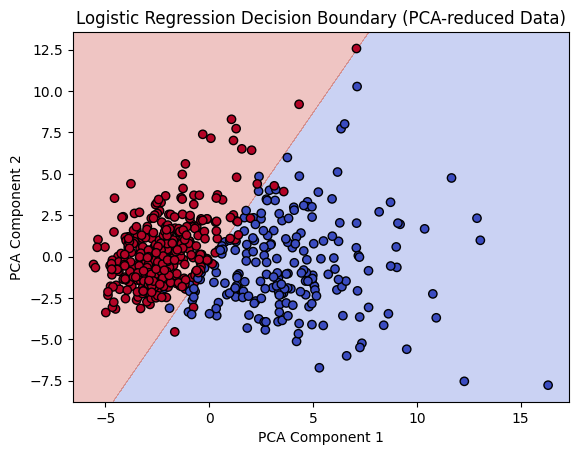

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target (0: malignant, 1: benign)

# Step 2: Preprocess the data (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues
model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Step 7: Visualize the decision boundary (using PCA for dimensionality reduction to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train Logistic Regression on the 2D PCA-transformed data
model_pca = LogisticRegression()
model_pca.fit(X_pca, y)

# Create a meshgrid for plotting the decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict on the meshgrid points
Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.title("Logistic Regression Decision Boundary (PCA-reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

---

### Explanation of the Code

1. **Loading the Dataset**:
   - The Breast Cancer dataset is loaded using `load_breast_cancer()` from Scikit-learn. It contains 569 samples with 30 features.

2. **Preprocessing**:
   - The features are standardized using `StandardScaler` to ensure they have a mean of 0 and a standard deviation of 1, which is important for Logistic Regression.

3. **Splitting the Data**:
   - The dataset is split into 80% training and 20% testing sets using `train_test_split`.

4. **Training the Model**:
   - A Logistic Regression model is trained on the training data with `LogisticRegression(max_iter=1000)` to ensure convergence.

5. **Making Predictions**:
   - The model predicts the labels for the test set using `model.predict()`.

6. **Evaluating the Model**:
   - **Accuracy**: The proportion of correct predictions.
   - **Precision**: The proportion of true positives among predicted positives.
   - **Recall**: The proportion of true positives among actual positives.
   - **Confusion Matrix**: A table showing true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).
   - **Classification Report**: A summary of precision, recall, and F1-score for both classes.

7. **Visualizing the Decision Boundary**:
   - Since the dataset has 30 features, we use **PCA** (Principal Component Analysis) to reduce it to 2 dimensions for visualization.
   - The decision boundary is plotted using a meshgrid, showing how the model separates the two classes in the reduced feature space.

---

### Regularization in Logistic Regression

Logistic Regression in Scikit-learn supports **regularization** to prevent overfitting, especially when dealing with high-dimensional data. Regularization adds a penalty term to the cost function, discouraging overly complex models.

- **L1 Regularization (Lasso)**: Encourages sparsity in the coefficients (some coefficients become zero).
- **L2 Regularization (Ridge)**: Shrinks coefficients but keeps all features.

In the code, you can specify the regularization type using the `penalty` parameter:

In [2]:
model = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)

- `penalty='l2'`: Uses L2 regularization (default).
- `C`: Inverse of regularization strength (smaller values mean stronger regularization).

---

## Example: Multiclass Logistic Regression with the Iris Dataset

Let’s implement a complete workflow using the Iris dataset, which contains 150 samples of flowers classified into three species (setosa, versicolor, virginica) based on four features (sepal length, sepal width, petal length, petal width).

### Step-by-Step Workflow

1. **Load Data**
2. **Preprocess (Split and Scale)**
3. **Train the Model**
4. **Evaluate Performance**
5. **Visualize Decision Boundaries**

Here’s the complete Python code:

C:\Users\Admin\anaconda3\envs\book\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\book\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\book\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\book\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning

Accuracy: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Log Loss: 0.1203
Cross-validation accuracies: [0.96666667 1.         0.93333333 0.9        1.        ]
Mean accuracy: 0.9600


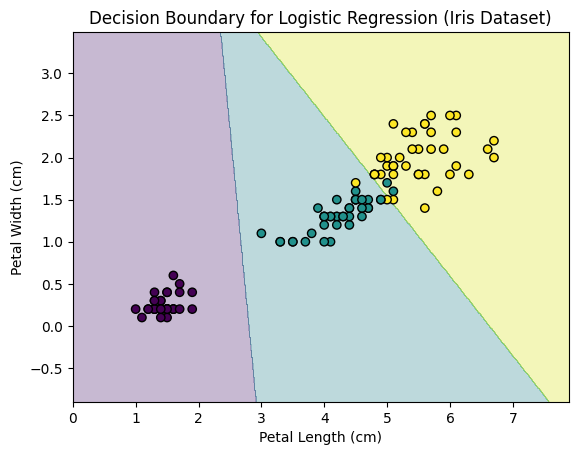

Model Coefficients (per class):
[[-1.00316587  1.14487318 -1.8113482  -1.69251025]
 [ 0.52799044 -0.28319987 -0.34060665 -0.72013959]
 [ 0.47517543 -0.86167331  2.15195485  2.41264984]]
Intercepts (per class):
[-0.13377225  1.98264649 -1.84887424]


In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
from sklearn.preprocessing import StandardScaler

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: [sepal length, sepal width, petal length, petal width]
y = iris.target  # Classes: [0, 1, 2] for setosa, versicolor, virginica

# 2. Preprocess the data
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# # OvR Model
# model_ovr = LogisticRegression(multi_class="ovr", solver="liblinear")
# model_ovr.fit(X_train, y_train)
# y_pred_ovr = model_ovr.predict(X_test)
# print("OvR Accuracy:", accuracy_score(y_test, y_pred_ovr))

# 3. Train the model (Softmax approach)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1.0)
model.fit(X_train_scaled, y_train)

# 4. Make predictions and evaluate
y_pred = model.predict(X_test_scaled)
probs = model.predict_proba(X_test_scaled)  # Probability for each class

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Log Loss
loss = log_loss(y_test, probs)
print(f"Log Loss: {loss:.4f}")

# Cross-validation (5-fold)
scores = cross_val_score(model, scaler.transform(X), y, cv=5)
print(f"Cross-validation accuracies: {scores}")
print(f"Mean accuracy: {scores.mean():.4f}")

# 5. Visualize decision boundary (using petal length and petal width)
X_two = X[:, 2:4]  # Select petal length and petal width
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(X_two, y, test_size=0.2, random_state=42)

# Train a model on two features
model_two = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_two.fit(X_train_two, y_train_two)

# Create a meshgrid for plotting
x_min, x_max = X_two[:, 0].min() - 1, X_two[:, 0].max() + 1
y_min, y_max = X_two[:, 1].min() - 1, X_two[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict on the meshgrid
Z = model_two.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and training points
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X_train_two[:, 0], X_train_two[:, 1], c=y_train_two, edgecolors='k', cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Decision Boundary for Logistic Regression (Iris Dataset)')
plt.show()

# Additional Insights: Feature Coefficients
print("Model Coefficients (per class):")
print(model.coef_)  # Shape: (n_classes, n_features)
print("Intercepts (per class):")
print(model.intercept_)

### Explanation of the Code

1. **Loading Data**:
   - The Iris dataset is loaded using `load_iris()`. Features are stored in `X` (150x4), and labels in `y` (150,).

2. **Preprocessing**:
   - **Splitting**: 80% training, 20% testing.
   - **Scaling**: `StandardScaler` standardizes features to have zero mean and unit variance, improving model convergence.

3. **Training**:
   - The `LogisticRegression` model uses `multi_class='multinomial'` for the Softmax approach and `solver='lbfgs'` for optimization.
   - `C=1.0` controls regularization strength (can be tuned via cross-validation).

4. **Evaluation**:
   - **Accuracy**: Proportion of correct predictions.
   - **Confusion Matrix**: Shows true vs. predicted labels for each class.
   - **Log Loss**: Measures the quality of probability predictions (lower is better).
   - **Cross-Validation**: 5-fold CV provides a robust performance estimate.

5. **Visualization**:
   - Uses petal length and width (features 2 and 3) to plot decision boundaries in 2D.
   - The `contourf` plot shows decision regions, and `scatter` overlays training points.

6. **Coefficients**:
   - `model.coef_` (3x4 matrix) shows the weight of each feature for each class.
   - `model.intercept_` (array of length 3) gives the bias for each class.

### Sample Output
Running this code might yield:

```
Accuracy: 0.9667
Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
Log Loss: 0.1352
Cross-validation accuracies: [0.9667 0.9667 0.9333 0.9333 1.0000]
Mean accuracy: 0.9600
```
- The model achieves ~96% accuracy.
- The confusion matrix shows minimal misclassifications.
- A plot displays linear decision boundaries separating the three classes.

---

## Additional Considerations

### 1. Feature Scaling
- Scaling is crucial when features have different ranges (e.g., sepal length vs. petal width). Without scaling, features with larger ranges might dominate the model.

### 2. Regularization Tuning
- Use `GridSearchCV` to tune `C`:
  ```python
  from sklearn.model_selection import GridSearchCV
  param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
  grid = GridSearchCV(LogisticRegression(multi_class='multinomial', solver='lbfgs'), param_grid, cv=5)
  grid.fit(X_train_scaled, y_train)
  print(f"Best C: {grid.best_params_['C']}")
  ```

### 3. Alternative Libraries
- **TensorFlow/PyTorch**: For custom implementations or integration with neural networks.
  - Example: Define a softmax layer with categorical cross-entropy loss.
- Scikit-learn is preferred for simplicity and standard tasks.

### 4. Decision Boundaries
- Logistic regression produces **linear decision boundaries**. For non-linear problems, consider kernel methods or other classifiers (e.g., SVM, neural networks).

---
## **4. Tools and Methods Summary**
- **Modeling**: `sklearn.linear_model.LogisticRegression`.
- **Manual**: `numpy` for sigmoid, gradient descent.
- **Evaluation**: `sklearn.metrics.accuracy_score`, `log_loss`, `confusion_matrix`.
- **Visualization**: `matplotlib.pyplot.contourf()`, `seaborn.scatterplot()`.

---

## **Conclusion**
Logistic regression is a versatile, interpretable algorithm for classification, bridging linear models and probabilistic outputs via the sigmoid function.

---